In [1]:
import os
import cv2

# Define the path to your dataset folder
dataset_dir = 'C:\\Users\\nidhi\\Desktop\\Data\\Dataset'

# Define the target size for resizing
target_size = (64, 64)


# Loop through the subfolders (classes) in the dataset directory
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    
    # Loop through the image files in each class folder
    for filename in os.listdir(class_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # You can extend this list to include other image formats
            image_path = os.path.join(class_path, filename)
            
            # Read and resize the image
            image = cv2.imread(image_path)
            if image is not None:
                resized_image = cv2.resize(image, target_size)
                
                # Overwrite the original image with the resized one
                cv2.imwrite(image_path, resized_image)

In [2]:
import os
import shutil
import random

# Define paths
data_dir = "C:\\Users\\nidhi\\Desktop\\Data\\Dataset"
train_dir = "C:\\Users\\nidhi\\Desktop\\Data\\train"
val_dir = "C:\\Users\\nidhi\\Desktop\\Data\\validation"
test_dir = "C:\\Users\\nidhi\\Desktop\\Data\\test"

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the split ratios (e.g., 60% train, 20% validation, 20% test)
train_ratio = 0.60
val_ratio = 0.20
test_ratio = 0.20

# List all subfolders (assuming each subfolder represents a class)
subfolders = os.listdir(data_dir)

# Iterate through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(data_dir, subfolder)
    
    # List all files in the subfolder
    file_list = os.listdir(subfolder_path)
    random.shuffle(file_list)

    # Calculate the number of samples for each split
    total_samples = len(file_list)
    train_samples = int(train_ratio * total_samples)
    val_samples = int(val_ratio * total_samples)

    # Split the dataset
    train_files = file_list[:train_samples]
    val_files = file_list[train_samples:train_samples + val_samples]
    test_files = file_list[train_samples + val_samples:]

    # Create subdirectories in train, validation, and test directories
    subfolder_train_dir = os.path.join(train_dir, subfolder)
    subfolder_val_dir = os.path.join(val_dir, subfolder)
    subfolder_test_dir = os.path.join(test_dir, subfolder)
    
    os.makedirs(subfolder_train_dir, exist_ok=True)
    os.makedirs(subfolder_val_dir, exist_ok=True)
    os.makedirs(subfolder_test_dir, exist_ok=True)

    # Move the files to their respective subdirectories
    for file in train_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(subfolder_train_dir, file)
        shutil.copy(src, dst)

    for file in val_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(subfolder_val_dir, file)
        shutil.copy(src, dst)

    for file in test_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(subfolder_test_dir, file)
        shutil.copy(src, dst)

Found 1283 images belonging to 2 classes.
Found 1269 images belonging to 2 classes.
Found 1257 images belonging to 2 classes.
Epoch 1/20
41/41 [==============================] - 22s 467ms/step - loss: 0.4792 - accuracy: 0.7638 - val_loss: 0.4649 - val_accuracy: 0.7675
Epoch 2/20
41/41 [==============================] - 11s 278ms/step - loss: 0.4630 - accuracy: 0.7685 - val_loss: 0.4649 - val_accuracy: 0.7675
Epoch 3/20
41/41 [==============================] - 11s 278ms/step - loss: 0.4630 - accuracy: 0.7685 - val_loss: 0.4649 - val_accuracy: 0.7675
Epoch 4/20
41/41 [==============================] - 12s 282ms/step - loss: 0.4630 - accuracy: 0.7685 - val_loss: 0.4649 - val_accuracy: 0.7675
Epoch 5/20
41/41 [==============================] - 11s 276ms/step - loss: 0.4630 - accuracy: 0.7685 - val_loss: 0.4649 - val_accuracy: 0.7675
Epoch 6/20
41/41 [==============================] - 11s 275ms/step - loss: 0.4630 - accuracy: 0.7685 - val_loss: 0.4649 - val_accuracy: 0.7675
Epoch 7/20
41/41

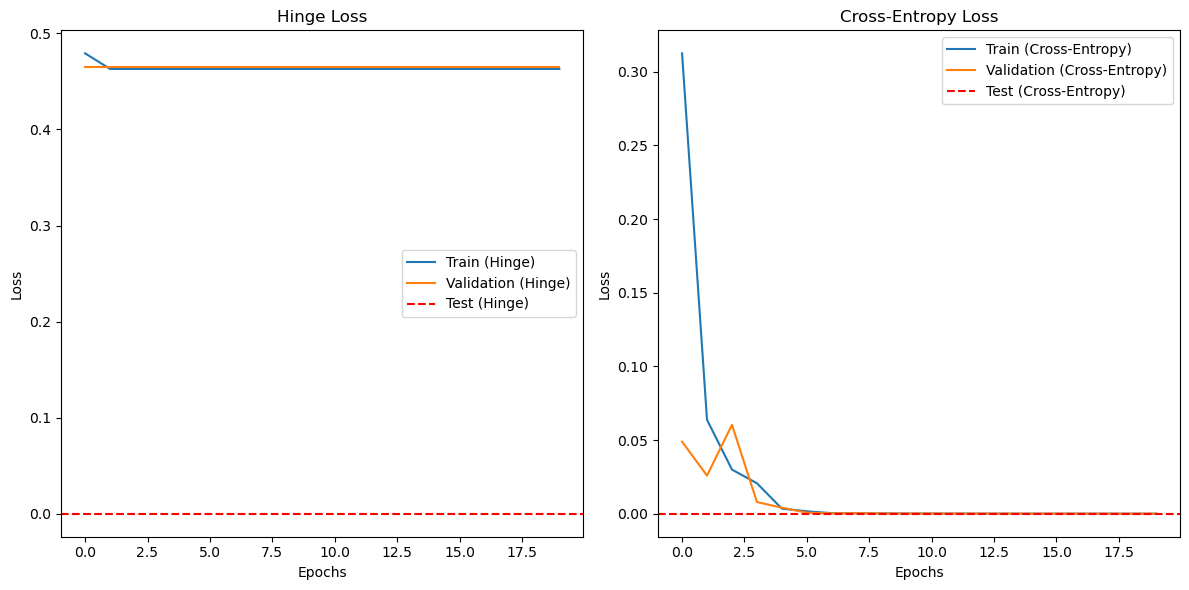

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define constants
batch_size = 32
epochs = 20

# Create data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'binary' for hinge loss
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical' # Change to 'binary' for hinge loss
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'binary' for hinge loss
)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(subfolders), activation='softmax')  # Softmax for multi-class, sigmoid for binary
])

# Compile the model with hinge loss function
model.compile(optimizer='adam', loss='categorical_hinge', metrics=['accuracy'])  # Change to 'hinge' for binary

# Train the model
history_hinge = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Define a new model for cross-entropy loss
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(subfolders), activation='softmax')  # Softmax for multi-class, sigmoid for binary
])

# Compile the model with cross-entropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Change to 'binary_crossentropy' for binary

# Train the model
history_cross_entropy = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate the models on the test set
test_loss_hinge, test_accuracy_hinge = model.evaluate(test_generator)
print(f'Test Loss (Hinge): {test_loss_hinge}')
print(f'Test Accuracy (Hinge): {test_accuracy_hinge}')

# Evaluate the models on the test set with cross-entropy loss
test_loss_cross_entropy, test_accuracy_cross_entropy = model.evaluate(test_generator)
print(f'Test Loss (Cross-Entropy): {test_loss_cross_entropy}')
print(f'Test Accuracy (Cross-Entropy): {test_accuracy_cross_entropy}')

# Plot training and validation loss values for both models, including test loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_hinge.history['loss'], label='Train (Hinge)')
plt.plot(history_hinge.history['val_loss'], label='Validation (Hinge)')
plt.axhline(y=test_loss_hinge, color='r', linestyle='--', label='Test (Hinge)')
plt.title('Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cross_entropy.history['loss'], label='Train (Cross-Entropy)')
plt.plot(history_cross_entropy.history['val_loss'], label='Validation (Cross-Entropy)')
plt.axhline(y=test_loss_cross_entropy, color='r', linestyle='--', label='Test (Cross-Entropy)')
plt.title('Cross-Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


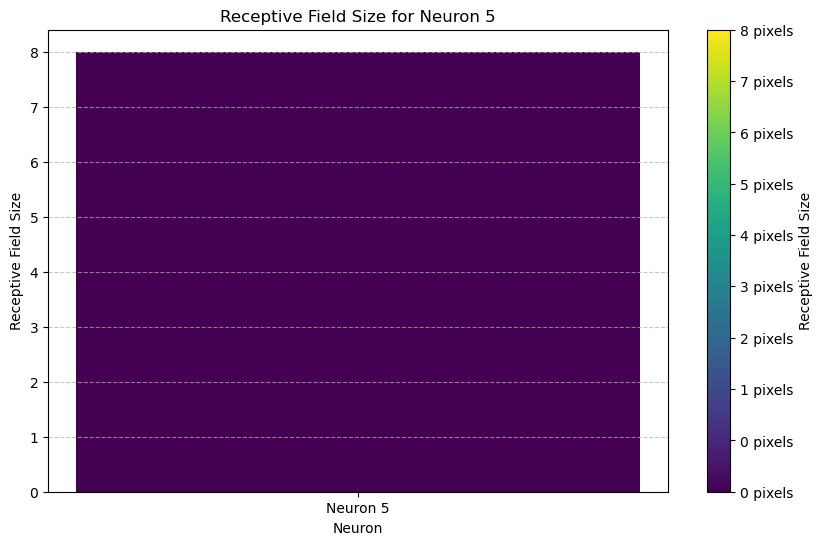

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained model or create your own CNN model
# For demonstration purposes, let's create a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for illustration
])

# Choose a specific neuron to calculate the receptive field for
chosen_layer_idx = 2  # Index of the chosen convolutional layer
chosen_neuron_idx = 5  # Index of the chosen neuron within the layer

# Function to calculate the receptive field size
def calculate_receptive_field(model, chosen_layer_idx, chosen_neuron_idx):
    receptive_field_size = 1  # Initialize with a size of 1 (the neuron itself)

    # Loop through the layers in reverse order from the chosen layer
    for i in range(chosen_layer_idx, -1, -1):
        layer = model.layers[i]

        if isinstance(layer, tf.keras.layers.Conv2D):
            kernel_size = layer.kernel_size[0]
            stride = layer.strides[0]
            receptive_field_size = (receptive_field_size - 1) * stride + kernel_size

        elif isinstance(layer, tf.keras.layers.MaxPooling2D):
            pool_size = layer.pool_size[0]
            receptive_field_size *= pool_size

    return receptive_field_size

# Calculate the receptive field size for the chosen neuron
receptive_field = calculate_receptive_field(model, chosen_layer_idx, chosen_neuron_idx)

# Create a colorful bar chart with a color scale
num_colors = 10
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))  # Using Viridis color map

plt.figure(figsize=(10, 6))
plt.bar(["Neuron " + str(chosen_neuron_idx)], [receptive_field], color=colors)
plt.title(f"Receptive Field Size for Neuron {chosen_neuron_idx}")
plt.xlabel("Neuron")
plt.ylabel("Receptive Field Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the color scale
color_values = np.linspace(0, 1, num_colors) * receptive_field
color_labels = [f"{int(val)} pixels" for val in color_values]
color_scale = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=receptive_field))
color_scale.set_array([])

# Specify the ax parameter to prevent the warning
colorbar = plt.colorbar(color_scale, ticks=color_values, label='Receptive Field Size', ax=plt.gca())
colorbar.set_ticklabels(color_labels)

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import ParameterGrid

# Define constants
batch_size = 32
epochs = 20
target_size = (64, 64)

# Create data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define a function to create the neural network model with L2 regularization
def create_model(regularization_strength=0.01):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_strength)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_strength)),
        Dense(len(subfolders), activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Define hyperparameter grid for regularization strength
param_grid = {
    'regularization_strength': [0.001, 0.01, 0.1, 1.0]
}

best_accuracy = 0
best_params = None

# Perform grid search manually
for params in ParameterGrid(param_grid):
    print(f"Testing Regularization Strength: {params['regularization_strength']}")
    
    model = create_model(params['regularization_strength'])
    model.fit(train_generator, epochs=epochs, validation_data=val_generator, verbose=0)
    
    # Evaluate on validation set
    _, val_accuracy = model.evaluate(val_generator)
    
    print(f"Validation Accuracy: {val_accuracy}")
    
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = params

print(f"Best Regularization Strength: {best_params['regularization_strength']}")
print(f"Best Validation Accuracy: {best_accuracy}")

# Train the final model with the best hyperparameter on the entire training set
final_model = create_model(regularization_strength=best_params['regularization_strength'])
final_model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Found 1283 images belonging to 2 classes.
Found 1269 images belonging to 2 classes.
Testing Regularization Strength: 0.001
40/40 [==============================] - 3s 70ms/step - loss: 0.0147 - accuracy: 1.0000
Validation Accuracy: 1.0
Testing Regularization Strength: 0.01
40/40 [==============================] - 3s 69ms/step - loss: 0.0411 - accuracy: 1.0000
Validation Accuracy: 1.0
Testing Regularization Strength: 0.1
